This notebook shows the process of income prediction based on OBESITY dataset when fairness through unawareness approach is applied. This means that only the protected attributes are removed from the dataset.

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../')

In [3]:
obesity_dataset = pd.read_csv('./obesity_level.csv', sep=',')

In [4]:
obesity_dataset

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS  Obesity  
0             no  Public_Transportation        0  
1      Sometimes  Public_Transportation        0  
2     Frequently  Public_Transportation        0  
3     Frequently                Walking        0  
4      Sometimes  Public_Transportation        0  
...          ...                    ...      ...  
2106   Sometimes  Public_Transportation        1  
2107   Sometimes  Public_Transportation        1  
2108   Sometimes  Public_Transportation        1  
2109   Sometimes  Public_Transportation        1  
2110   Sometimes  Public_Transportation        1  

[2111 rows x 17 columns]

In [5]:
from fairness.pre_processing import categorical_to_numeric_converter, fix_attributes


new_obesity_dataset = categorical_to_numeric_converter(obesity_dataset)

At this point there's the protected attributes removal from the dataset. In this case we have chosen the following variable to be protected, according to the domain of the dataset:
* Gender

In [6]:
protected_attributes = ['Gender']

new_obesity_dataset.drop(columns=protected_attributes, inplace=True)

In [7]:
new_obesity_dataset

Age    Height      Weight  family_history_with_overweight  FAVC  \
0     21.000000  1.620000   64.000000                               1     0   
1     21.000000  1.520000   56.000000                               1     0   
2     23.000000  1.800000   77.000000                               1     0   
3     27.000000  1.800000   87.000000                               0     0   
4     22.000000  1.780000   89.800000                               0     0   
...         ...       ...         ...                             ...   ...   
2106  20.976842  1.710730  131.408528                               1     1   
2107  21.982942  1.748584  133.742943                               1     1   
2108  22.524036  1.752206  133.689352                               1     1   
2109  24.361936  1.739450  133.346641                               1     1   
2110  23.664709  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \
0      2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3       3   
1      3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2       3   
2      2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1       3   
3      3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1       4   
4      2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2       3   
...    ...  ...   ...    ...       ...  ...       ...       ...   ...     ...   
2106   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2       3   
2107   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2       3   
2108   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2       3   
2109   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2       3   
2110   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2       3   

      Obesity  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
2106        1  
2107        1  
2108        1  
2109        1  
2110        1  

[2111 rows x 16 columns]

After the pre-processing step and after the protected attributes removal it's important to move to the training and prediction step

In [8]:
from sklearn.model_selection import train_test_split

X = new_obesity_dataset.drop(columns=['Obesity'], inplace=False)
y = new_obesity_dataset['Obesity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

After the split of the dataset, the next step is to perform the calculations of the best parameters for the several models we want to use for the prediction step.Since this is a problem of multiclass classification, the chosen models are the following:

* RandomForest Classifier
* Logistic Regression
* DecisionTree Classifier

The best params for the RandomForest Classifier are:  {'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 40, 'n_estimators': 80}


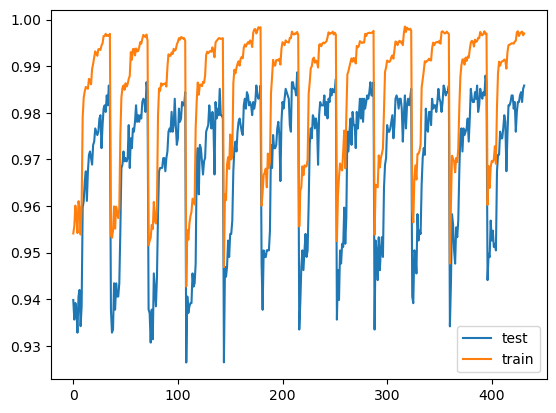

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier()
random_forest_params = {'n_estimators': range(10, 100, 10), 'criterion': ['gini', 'entropy', 'log_loss'], 
                        'max_depth': range(10, 50, 10), 'max_leaf_nodes': range(10, 50, 10)}

grid_search = GridSearchCV(random_forest_model, param_grid=random_forest_params, cv=10, return_train_score=True)
random_forest = grid_search.fit(X_train, y_train)

print("The best params for the RandomForest Classifier are: ", random_forest.best_params_)

test_scores = random_forest.cv_results_['mean_test_score']
train_scores = random_forest.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

predicted_result = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for random_forest: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=random_forest.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=random_forest.classes_)
display.plot()
plt.show()

Accuracy for random_forest:  0.9842180774748924


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression_model = LogisticRegression(multi_class='multinomial')
logistic_regression_params = {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

grid_search = GridSearchCV(logistic_regression_model, param_grid=logistic_regression_params, cv=10, return_train_score=True)
logistic_regression = grid_search.fit(X_train, y_train)

print("The best params for the Logistic Regression are: ", random_forest.best_params_)

test_scores = logistic_regression.cv_results_['mean_test_score']
train_scores = logistic_regression.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

The best params for the Logistic Regression are:  {'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 40, 'n_estimators': 80}


Accuracy for logistic regression:  0.9655667144906743


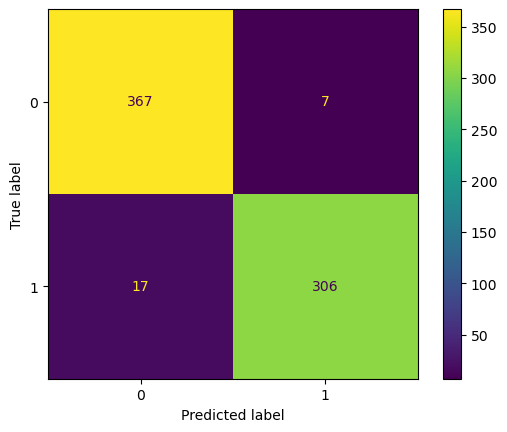

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_result = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for logistic regression: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=logistic_regression.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=logistic_regression.classes_)
display.plot()
plt.show()

The best params for DecisionTree Classifier are:  {'criterion': 'entropy', 'max_depth': 30, 'max_leaf_nodes': 30}


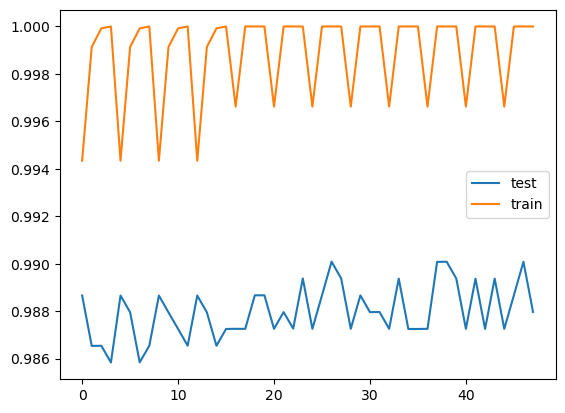

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_model = DecisionTreeClassifier()
decision_tree_params = {'criterion': ['gini', 'entropy', 'log_loss'], 
                        'max_depth': range(10, 50, 10), 'max_leaf_nodes': range(10, 50, 10)}

grid_search = GridSearchCV(decision_tree_model, param_grid=decision_tree_params, cv=10, return_train_score=True)
decision_tree = grid_search.fit(X_train, y_train)
best_params = decision_tree.best_params_
print("The best params for DecisionTree Classifier are: ", best_params)

test_scores = decision_tree.cv_results_['mean_test_score']
train_scores = decision_tree.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

Accuracy for decision tree classifier:  0.9913916786226685


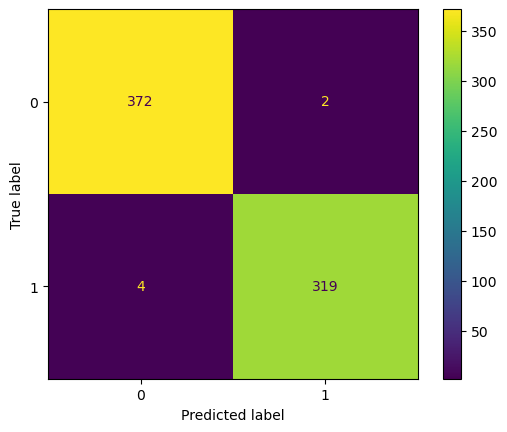

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_result = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predicted_result)
print("Accuracy for decision tree classifier: ", accuracy)

matrix = confusion_matrix(y_test, predicted_result, labels=decision_tree.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=decision_tree.classes_)
display.plot()
plt.show()